In [1]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import sys
import csv
import os
from pprint import pprint
from pandas import DataFrame
import datetime as dt

In [2]:
## get key from os
#api_key = os.environ.get('weather_api_key')
api_key = os.environ.get('gov_data_api_key')
#print(api_key)



#url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?'
url = 'https://api.usa.gov/crime/fbi/sapi/api/participation/national?'
#url = 'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2015/2019?'
query_url = url + 'api_key=' + 'iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
print(query_url)

https://api.usa.gov/crime/fbi/sapi/api/participation/national?api_key=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv


In [3]:
crime_data = requests.get(query_url).json()

In [4]:
print(json.dumps(crime_data, indent=4, sort_keys=True))

{
    "pagination": {
        "count": 39,
        "page": 0,
        "pages": 1,
        "per_page": 0
    },
    "results": [
        {
            "active_agency_count": 21994,
            "agency_count_asr_submitting": 13694,
            "agency_count_hc_submitting": 16300,
            "agency_count_leoka_submitting": 6564,
            "agency_count_nibrs_submitting": 7102,
            "agency_count_pe_submitting": 16784,
            "agency_count_srs_submitting": 9696,
            "covered_agency_count": 1,
            "csv_header": "data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting",
            "data_year": 2017,
            "nibrs_population_covered": 109672672,
            "population": 335302926,
            "population_covered": 0,
            "published_agency_count": 16783,
            "t

In [5]:
crime_data["results"][0]

{'data_year': 2017,
 'population': 335302926,
 'total_agency_count': 18642,
 'published_agency_count': 16783,
 'active_agency_count': 21994,
 'covered_agency_count': 1,
 'population_covered': 0,
 'agency_count_nibrs_submitting': 7102,
 'agency_count_leoka_submitting': 6564,
 'agency_count_pe_submitting': 16784,
 'agency_count_srs_submitting': 9696,
 'agency_count_asr_submitting': 13694,
 'agency_count_hc_submitting': 16300,
 'nibrs_population_covered': 109672672,
 'total_population': 335302926,
 'csv_header': 'data_year,population,total_agency_count,published_agency_count,active_agency_count,covered_agency_count,population_covered,agency_count_nibrs_submitting,agency_count_leoka_submitting,agency_count_pe_submitting,agency_count_srs_submitting'}

In [6]:
data_dict = crime_data['results']

In [7]:
df = pd.DataFrame(data_dict)
#df = df.drop(columns=['incident_count'])
df['data_year'] = df['data_year'].apply(np.int64)
df = df.sort_values('data_year')
#df.head(8)

#df.to_csv('offense_api_data.csv', header=True, index=True, index_label= 'Index')
df.head(2)

,active_agency_count,agency_count_asr_submitting,agency_count_hc_submitting,agency_count_leoka_submitting,agency_count_nibrs_submitting,agency_count_pe_submitting,agency_count_srs_submitting,covered_agency_count,csv_header,data_year,nibrs_population_covered,population,population_covered,published_agency_count,total_agency_count,total_population
38,23303,10022,0,0,0,14036,14034,0,"data_year,population,total_agency_count,publis...",1979,0,225960164,0,14033,22594,225960164
37,23301,9623,0,0,0,14155,14153,0,"data_year,population,total_agency_count,publis...",1980,0,231563235,0,14152,22484,231563235


In [8]:
# Normalize NIBRS Violent Crime data to same years as Background Checks
df_mo = df[(df['data_year'] >= 1998 ) & (df['data_year'] <= 2019)].groupby(['data_year'])['total_agency_count'].sum()
#df_mo.head()

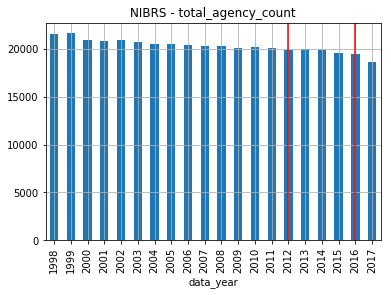

In [9]:
# Plot the National Incident Based Reporting System (NIBRS) - Violent Crimes Data 
ax1 = df_mo.plot.bar(x='data_year', y='total_agency_count')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NIBRS - total_agency_count')
#plt.xlabel('x label text')
#plt.ylabel('y label text')

plt.axvline(x=14, ymin=0, ymax=1, color="r")
plt.axvline(x=18, ymin=0, ymax=1, color="r")

plt.savefig('output/NIBRS_Violent_Crimes.png', bbox_inches="tight")


In [10]:
## get key from os
#api_key = os.environ.get('weather_api_key')
#api_key = os.environ.get('crime_data_api_key')
#print(api_key)

# URL for National Incident Based Reporting System (NIBRS) - Violent Crimes API call
#url = 'https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/violent-crime/offense/national/count?'

#query_url = url + 'api_key=' + 'iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv' 
#print(query_url)

In [11]:
#crime_data = requests.get(query_url).json()

In [12]:
#print(json.dumps(crime_data, indent=4, sort_keys=True))